In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH='C:/Users/Administrator/Desktop/'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from operator import add

%matplotlib inline

import os
for dirname, _, filenames in os.walk('C:\Farmingtn'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Farmingtn\datasets_4123_6408_framingham.csv


In [4]:
df = pd.read_csv('datasets_4123_6408_framingham.csv')
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4240, 16)

In [6]:
# To check the total number of null values we have in each column

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Dropping the education column

df= df.drop("education",axis=1)


In [8]:
# Replacing the null values with 'mean()'

for value in ['cigsPerDay','BPMeds', 'totChol','BMI','glucose','heartRate']:
    df[value].fillna(round(df[value].mean()), inplace= True)

In [9]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.shape

(4240, 15)

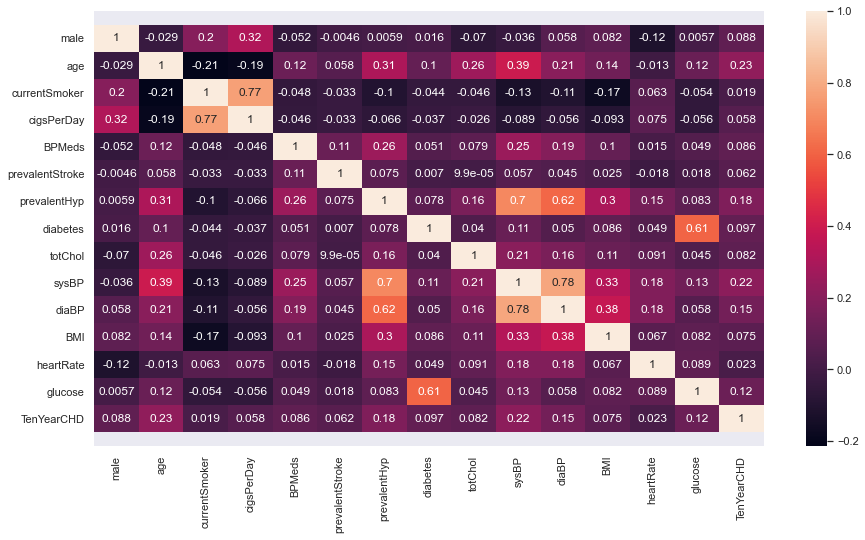

In [11]:
plt.figure(figsize=(15,8))
sns.set( font_scale=1.0)                                                  

ax =sns.heatmap(df.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(PATH+'Heatmp.png',dpi=300)
plt.show()


In [12]:
# Dropping 'cigsPerDay' column from our dataframe.

df=df.drop('cigsPerDay',axis=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks,names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=1000, verbose=2)
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_,df);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000
building tree 4 of 1000


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000building tree 15 of 1000

building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000building tree 20 of 1000

building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s



building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000building tree 65 of 1000

building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000building tree 77 of 1000

building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000building tree 83 of 1000
building tree 84 of 1000

building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000building tree 193 of 1000
building tree 194 of 1000

building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 377 of 1000
building tree 378 of 1000

building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000building tree 384 of 1000

building tree 385 of 1000
building tree 386 of 1000building tree 387 of 1000

building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000building tree 407 of 1000
building tree 408 of 1000

building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000building tree 414 of 1000

building tr

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    5.6s



building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.3s finished


In [15]:
print(ranks)



{'RF': {'male': 0.12, 'age': 0.8, 'currentSmoker': 0.09, 'BPMeds': 0.02, 'prevalentStroke': 0.0, 'prevalentHyp': 0.06, 'diabetes': 0.0, 'totChol': 0.93, 'sysBP': 0.97, 'diaBP': 0.75, 'BMI': 1.0, 'heartRate': 0.67, 'glucose': 0.85}}


In [16]:
my_rank = {'male': 0.12, 'age': 0.81, 'currentSmoker': 0.09, 'BPMeds': 0.02, 'prevalentStroke': 0.0, 'prevalentHyp': 0.06, 'diabetes': 0.0, 'totChol': 0.94, 'sysBP': 0.97, 'diaBP': 0.75, 'BMI': 1.0, 'heartRate': 0.67, 'glucose': 0.85}
dff = pd.DataFrame(list(my_rank.items()),columns = ['Features','Rank'])

# Sort the dataframe for decreasing order
feat_sort = dff.sort_values('Rank', ascending=False)
feat_sort

,Features,Rank
10,BMI,1.00
8,sysBP,0.97
7,totChol,0.94
12,glucose,0.85
1,age,0.81
9,diaBP,0.75
11,heartRate,0.67
0,male,0.12
2,currentSmoker,0.09
5,prevalentHyp,0.06


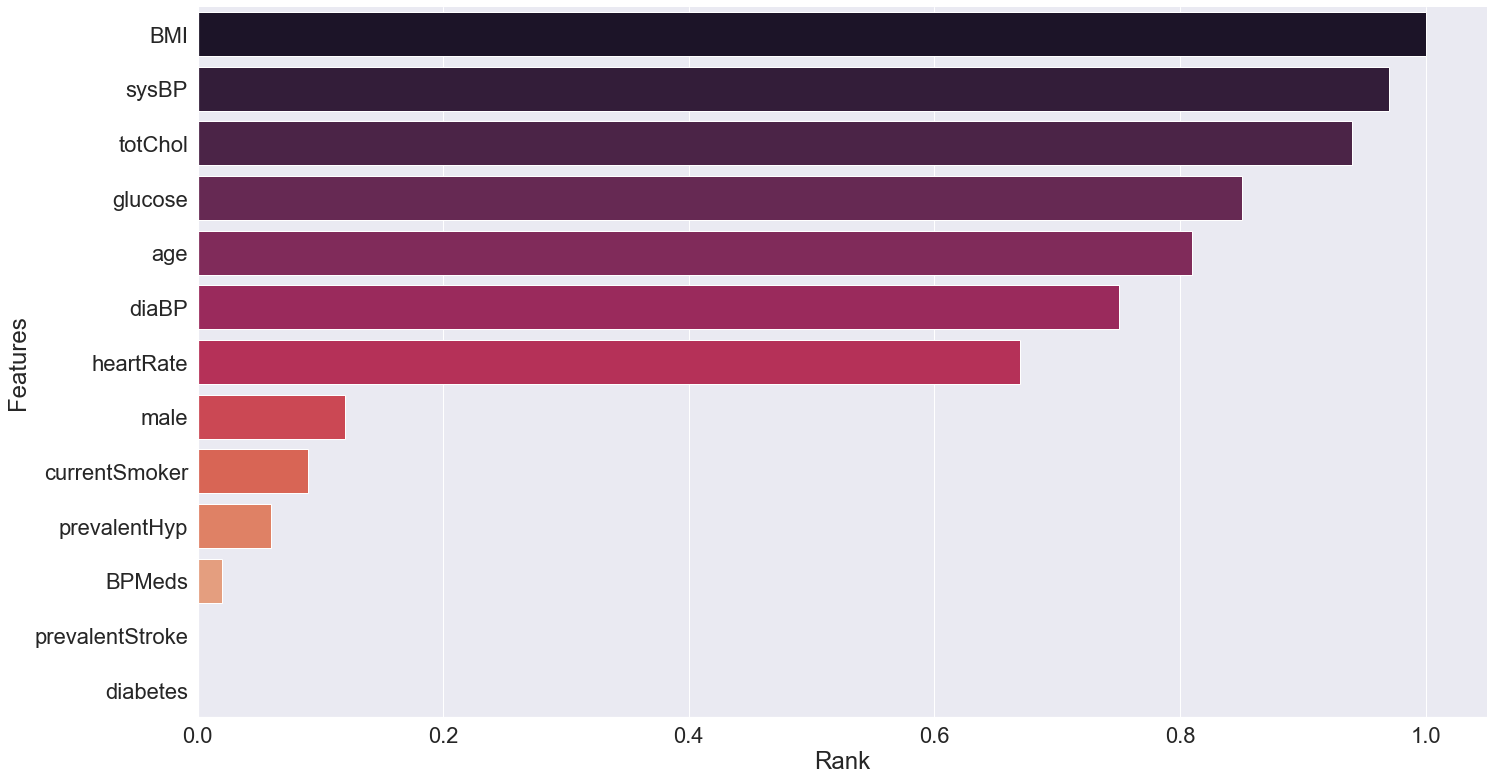

In [17]:
# Let's plot the ranking of the features
sns.set( font_scale=2)                                                  

sns.factorplot(x="Rank", y="Features", data = feat_sort, kind="bar", 
               size=11, aspect=1.9, palette='rocket')
plt.savefig(PATH+'FeatureRanking.png',dpi=300)


In [19]:
# select the top 6 features

top_features = df[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
plt.savefig(PATH+'TopFeaturs.png',dpi=300)

top_features



,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,195.0,106.0,70.0,26.97,80.0,77.0
1,46,250.0,121.0,81.0,28.73,95.0,76.0
2,48,245.0,127.5,80.0,25.34,75.0,70.0
3,61,225.0,150.0,95.0,28.58,65.0,103.0
4,46,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...
4235,48,248.0,131.0,72.0,22.00,84.0,86.0
4236,44,210.0,126.5,87.0,19.16,86.0,82.0
4237,52,269.0,133.5,83.0,21.47,80.0,107.0
4238,40,185.0,141.0,98.0,25.60,67.0,72.0


<Figure size 432x288 with 0 Axes>

In [20]:
# Apply SMOT
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [22]:
X=top_features
y = df.iloc[:,-1]

In [23]:
#the numbers before SMOTE
num_before = dict(Counter(y))
#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [24]:
print(num_before, num_after)

{0: 3596, 1: 644} {0: 3595, 1: 2876}


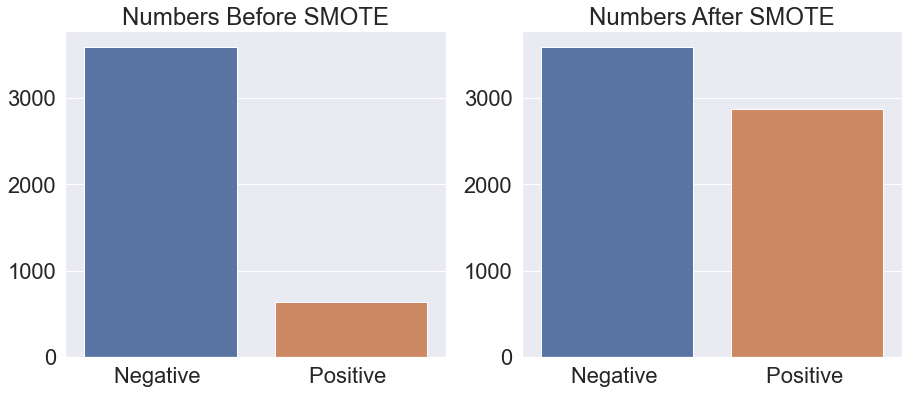

In [25]:

labels = ["Negative ","Positive "]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before SMOTE")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After SMOTE")
plt.savefig(PATH+'SMOTE.png',dpi=300)

plt.show()

In [26]:
X.shape

(4240, 7)

In [27]:
y.shape

(4240,)

In [28]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,45,217.0,109.0,72.0,33.65,75.0,68.0,0
1,50,301.0,117.5,80.0,28.04,60.0,72.0,0
2,53,250.0,149.5,95.0,28.02,68.0,82.0,0
3,36,280.0,151.0,96.0,25.35,78.0,94.0,0
4,48,246.0,165.0,84.0,27.60,122.0,73.0,0


In [29]:
X_new = new_data.iloc[:,:-1]
y_new= new_data.iloc[:,-1]
X_new.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,45,217.0,109.0,72.0,33.65,75.0,68.0
1,50,301.0,117.5,80.0,28.04,60.0,72.0
2,53,250.0,149.5,95.0,28.02,68.0,82.0
3,36,280.0,151.0,96.0,25.35,78.0,94.0
4,48,246.0,165.0,84.0,27.60,122.0,73.0


In [30]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [32]:
from sklearn.svm              import SVC
from sklearn.ensemble         import RandomForestClassifier
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import f1_score
from sklearn.metrics          import classification_report
from sklearn.metrics          import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [63]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1)
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=10, gamma=1)

In [64]:

# predictions
svm_predict = svm_clf.predict(X_test)



In [65]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f" SVM accuracy is {round(svm_accuracy*100,2)}%")


 SVM accuracy is 87.03%


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       734
           1       0.85      0.88      0.86       561

    accuracy                           0.88      1295
   macro avg       0.88      0.88      0.88      1295
weighted avg       0.88      0.88      0.88      1295



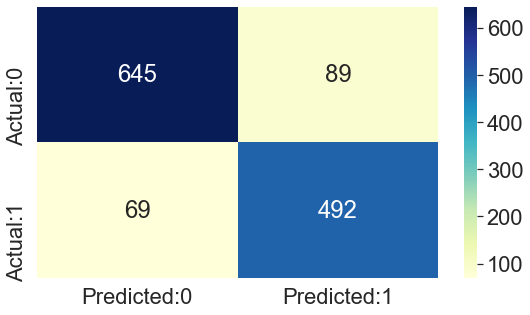

In [110]:
cfm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (9,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig(PATH+'SvmConfusionMatrix.png',dpi=300)

print(classification_report(y_test,svm_predict))


In [69]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best Random forest parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


RandomForestClassifier(n_estimators=1500)

In [72]:
# predictions
rf_predict = rf_clf.predict(X_test)


In [73]:
#accuracy
rf_accuracy = accuracy_score(y_test,rf_predict)
print(f" Random forest accuracy is {round(rf_accuracy*100,2)}%")

 Random forest accuracy is 87.8%


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       734
           1       0.85      0.88      0.86       561

    accuracy                           0.88      1295
   macro avg       0.88      0.88      0.88      1295
weighted avg       0.88      0.88      0.88      1295



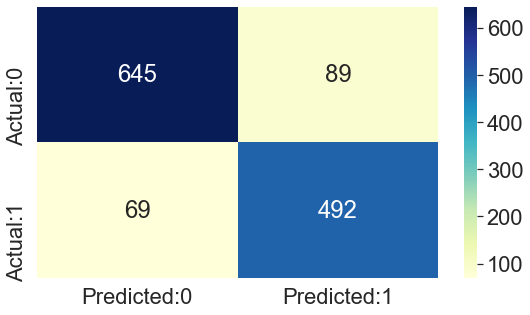

In [111]:
cfm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (9,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig(PATH+'RandomForestCfm.png',dpi=300)

print(classification_report(y_test,rf_predict))


In [69]:
# import the libraries
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam



In [73]:
# Define a Neural Network Model
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [74]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 34        
Total params: 818
Trainable params: 818
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
model.fit(X_train, y_train, batch_size = 16, nb_epoch = 100, verbose=2)

Epoch 1/100
5176/5176 - 0s - loss: 0.4327 - acc: 0.8029
Epoch 2/100
5176/5176 - 0s - loss: 0.4343 - acc: 0.8016
Epoch 3/100
5176/5176 - 0s - loss: 0.4298 - acc: 0.8033
Epoch 4/100
5176/5176 - 0s - loss: 0.4347 - acc: 0.7995
Epoch 5/100
5176/5176 - 0s - loss: 0.4345 - acc: 0.8045
Epoch 6/100
5176/5176 - 0s - loss: 0.4345 - acc: 0.8002
Epoch 7/100
5176/5176 - 0s - loss: 0.4328 - acc: 0.8047
Epoch 8/100
5176/5176 - 0s - loss: 0.4373 - acc: 0.7983
Epoch 9/100
5176/5176 - 0s - loss: 0.4282 - acc: 0.8035
Epoch 10/100
5176/5176 - 0s - loss: 0.4312 - acc: 0.8066
Epoch 11/100
5176/5176 - 0s - loss: 0.4301 - acc: 0.8064
Epoch 12/100
5176/5176 - 1s - loss: 0.4300 - acc: 0.8056
Epoch 13/100
5176/5176 - 1s - loss: 0.4317 - acc: 0.8022
Epoch 14/100
5176/5176 - 0s - loss: 0.4296 - acc: 0.8049
Epoch 15/100
5176/5176 - 0s - loss: 0.4358 - acc: 0.8035
Epoch 16/100
5176/5176 - 0s - loss: 0.4292 - acc: 0.8051
Epoch 17/100
5176/5176 - 0s - loss: 0.4305 - acc: 0.8053
Epoch 18/100
5176/5176 - 0s - loss: 0.42

In [87]:
# Predicting the Test set results
ann_pred = model.predict(X_test)



In [94]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(y_test, predictions))






Model Accracy: 75.2123552123552 %
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       734
           1       0.70      0.74      0.72       561

    accuracy                           0.75      1295
   macro avg       0.75      0.75      0.75      1295
weighted avg       0.75      0.75      0.75      1295



<AxesSubplot:>

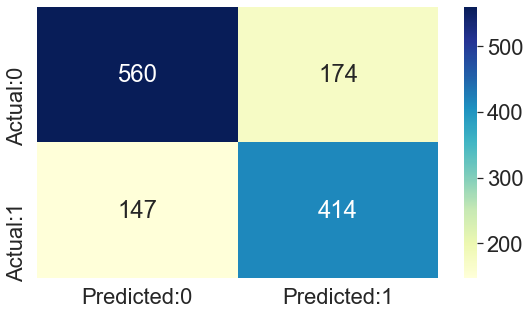

In [96]:
cfm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (9,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")